In [1]:
import gpytorch
import numpy as np
import pandas as pd
import torch

from bo_functions import ExactGPModel
from bo_functions import train_GP_model
from bo_functions import calc_ei_total
from bo_functions import calc_ei_total

from bo_plotters import plotter_adv
from bo_plotters import y_plotter_adv
from bo_plotters import stdev_plotter_adv
from bo_plotters import error_plotter_adv
from bo_plotters import error_plotter_adv_test
from bo_plotters import ei_plotter_adv

In [2]:
#Pull x and Y data from CSV
#Pull x data from CSV
exp_data_doc = "exp_data.csv"
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]

n = len(Xexp)
# print(n)
Theta_True = np.array([1,-1])

In [3]:
#Create training and test data
train_data_doc = "train_3_in_data.csv"
train_data = np.array(pd.read_csv(train_data_doc, header=0,sep=","))
# print(train_data)
train_theta = train_data[:,1:3]
train_p = torch.tensor(train_data[:,1:4])
train_y = torch.tensor(train_data[:,4])
# print(train_p)
# print(train_y)

In [4]:
# initialize likelihood and model
##Assumes a homoskedastic noise model p(y | f) = f + noise
likelihood = gpytorch.likelihoods.GaussianLikelihood()

# We will use the simplest form of GP model, exact inference
#Defines our model in terms of the class parameters in bo_functions
model = ExactGPModel(train_p, train_y, likelihood)

In [5]:
#Set number of training iterations and train GP
iterations = 500
train_GP_model(model,likelihood, train_p, train_y, iterations, verbose=True)

Iter 1/500 - Loss: 5.832   lengthscale: 0.693   noise: 0.693   output scale: 0.693 
Iter 2/500 - Loss: 5.519   lengthscale: 0.744   noise: 0.744   output scale: 0.744 
Iter 3/500 - Loss: 5.238   lengthscale: 0.798   noise: 0.798   output scale: 0.798 
Iter 4/500 - Loss: 4.985   lengthscale: 0.855   noise: 0.854   output scale: 0.853 
Iter 5/500 - Loss: 4.757   lengthscale: 0.914   noise: 0.911   output scale: 0.911 
Iter 6/500 - Loss: 4.552   lengthscale: 0.975   noise: 0.970   output scale: 0.970 
Iter 7/500 - Loss: 4.369   lengthscale: 1.039   noise: 1.030   output scale: 1.030 
Iter 8/500 - Loss: 4.207   lengthscale: 1.105   noise: 1.091   output scale: 1.091 
Iter 9/500 - Loss: 4.063   lengthscale: 1.171   noise: 1.154   output scale: 1.153 
Iter 10/500 - Loss: 3.936   lengthscale: 1.239   noise: 1.216   output scale: 1.216 
Iter 11/500 - Loss: 3.824   lengthscale: 1.305   noise: 1.279   output scale: 1.278 
Iter 12/500 - Loss: 3.726   lengthscale: 1.370   noise: 1.342   output sca

Iter 147/500 - Loss: 2.634   lengthscale: 1.801   noise: 4.203   output scale: 4.624 
Iter 148/500 - Loss: 2.633   lengthscale: 1.802   noise: 4.210   output scale: 4.637 
Iter 149/500 - Loss: 2.633   lengthscale: 1.803   noise: 4.217   output scale: 4.650 
Iter 150/500 - Loss: 2.632   lengthscale: 1.805   noise: 4.224   output scale: 4.664 
Iter 151/500 - Loss: 2.632   lengthscale: 1.806   noise: 4.231   output scale: 4.677 
Iter 152/500 - Loss: 2.631   lengthscale: 1.807   noise: 4.237   output scale: 4.690 
Iter 153/500 - Loss: 2.630   lengthscale: 1.808   noise: 4.244   output scale: 4.703 
Iter 154/500 - Loss: 2.630   lengthscale: 1.809   noise: 4.250   output scale: 4.717 
Iter 155/500 - Loss: 2.629   lengthscale: 1.810   noise: 4.257   output scale: 4.730 
Iter 156/500 - Loss: 2.629   lengthscale: 1.811   noise: 4.263   output scale: 4.743 
Iter 157/500 - Loss: 2.628   lengthscale: 1.812   noise: 4.269   output scale: 4.756 
Iter 158/500 - Loss: 2.627   lengthscale: 1.813   nois

Iter 294/500 - Loss: 2.583   lengthscale: 1.916   noise: 4.678   output scale: 6.306 
Iter 295/500 - Loss: 2.583   lengthscale: 1.917   noise: 4.678   output scale: 6.316 
Iter 296/500 - Loss: 2.583   lengthscale: 1.917   noise: 4.679   output scale: 6.326 
Iter 297/500 - Loss: 2.582   lengthscale: 1.918   noise: 4.679   output scale: 6.336 
Iter 298/500 - Loss: 2.582   lengthscale: 1.918   noise: 4.679   output scale: 6.346 
Iter 299/500 - Loss: 2.582   lengthscale: 1.919   noise: 4.680   output scale: 6.356 
Iter 300/500 - Loss: 2.582   lengthscale: 1.919   noise: 4.680   output scale: 6.366 
Iter 301/500 - Loss: 2.582   lengthscale: 1.920   noise: 4.680   output scale: 6.376 
Iter 302/500 - Loss: 2.581   lengthscale: 1.920   noise: 4.681   output scale: 6.386 
Iter 303/500 - Loss: 2.581   lengthscale: 1.921   noise: 4.681   output scale: 6.396 
Iter 304/500 - Loss: 2.581   lengthscale: 1.921   noise: 4.681   output scale: 6.406 
Iter 305/500 - Loss: 2.581   lengthscale: 1.922   nois

Iter 440/500 - Loss: 2.559   lengthscale: 1.973   noise: 4.495   output scale: 7.704 
Iter 441/500 - Loss: 2.558   lengthscale: 1.973   noise: 4.492   output scale: 7.713 
Iter 442/500 - Loss: 2.558   lengthscale: 1.973   noise: 4.490   output scale: 7.722 
Iter 443/500 - Loss: 2.558   lengthscale: 1.973   noise: 4.487   output scale: 7.731 
Iter 444/500 - Loss: 2.558   lengthscale: 1.973   noise: 4.484   output scale: 7.740 
Iter 445/500 - Loss: 2.558   lengthscale: 1.974   noise: 4.482   output scale: 7.750 
Iter 446/500 - Loss: 2.558   lengthscale: 1.974   noise: 4.479   output scale: 7.759 
Iter 447/500 - Loss: 2.558   lengthscale: 1.974   noise: 4.476   output scale: 7.768 
Iter 448/500 - Loss: 2.557   lengthscale: 1.974   noise: 4.473   output scale: 7.777 
Iter 449/500 - Loss: 2.557   lengthscale: 1.975   noise: 4.471   output scale: 7.786 
Iter 450/500 - Loss: 2.557   lengthscale: 1.975   noise: 4.468   output scale: 7.796 
Iter 451/500 - Loss: 2.557   lengthscale: 1.975   nois

In [6]:
# Get into evaluation (predictive posterior) mode
#Puts model in evaluation mode
model.eval()
#Puts likelihood in evaluation mode
likelihood.eval();

In [7]:
#Create Meshgrid
p = 10
Theta1 = np.linspace(-2,2,p)
Theta2 = np.linspace(-2,2,p)

theta_mesh = np.array(np.meshgrid(Theta1,Theta2))
theta_space = torch.tensor(theta_mesh.T.reshape(-1,2))

In [8]:
theta1_mesh = theta_mesh[0]
theta2_mesh = theta_mesh[1]

# for i in range(p):
#     for j in range(p):
#         print([theta1_mesh[i,j],theta2_mesh[i,j]])

In [9]:
#Will compare the rigorous solution and approximation later (multidimensional integral over each experiment using a sparse grid)

#Calculate EI
EI = calc_ei_total(p,n,Xexp,Yexp, theta_mesh, model, likelihood)[0]
print(EI)
Error =calc_ei_total(p,n,Xexp,Yexp, theta_mesh, model, likelihood)[1]

#Find Optimal Point (How should I actually be doing this?)
argmin = np.array(np.where(Error == np.amin(Error)))
Theta_1_Opt = float(theta1_mesh[argmin[0],argmin[1]])
Theta_2_Opt = float(theta2_mesh[argmin[0],argmin[1]])
Theta_GP_Opt = np.array((Theta_1_Opt,Theta_2_Opt))
print("The GP estimates \nTheta1, Theta2 = \n")
print(Theta_GP_Opt)

#Find point w/ best EI
argmax = np.array(np.where(EI == np.amax(EI)))
Theta_1_Best = float(theta1_mesh[argmax[0],argmax[1]])
Theta_2_Best = float(theta2_mesh[argmax[0],argmax[1]])
Theta_Best = np.array((Theta_1_Best,Theta_2_Best))
print("The GP estimates the highest EI is at \nTheta1, Theta2 = \n ")
print(Theta_Best)

[[1.87762272e-01 4.52375169e-01 1.81228375e-01 2.04051831e-03
  6.30671154e-01 2.71424624e+00 3.01976867e+00 3.34045691e+00
  3.64757492e+00 3.88345846e+00]
 [2.47552278e-02 1.02264517e-01 4.37033933e-01 5.85000099e-05
  4.48207971e-01 9.29343006e-01 1.10714949e+00 1.31538449e+00
  1.54694807e+00 1.77785400e+00]
 [3.20539068e-05 1.09430622e-03 3.66317621e-02 3.69948215e-02
  4.99775967e-02 7.70218406e-02 1.20658231e-01 1.84763339e-01
  2.73816795e-01 3.91745596e-01]
 [2.17647659e-04 4.51695462e-04 2.46560755e-04 1.31375171e-02
  2.21227084e-05 1.04665672e-02 3.89082943e-03 4.13048099e-04
  1.63981357e-05 2.89725450e-03]
 [1.80064002e-02 8.99494493e-02 8.15836347e-02 7.94322862e-03
  1.46725833e-03 6.45120845e-03 4.28394103e-01 4.25978087e-01
  2.67484947e-01 1.19892213e-01]
 [1.00800745e-01 3.17254512e-01 3.18375092e-01 1.56345698e-01
  3.67764039e-02 9.30139524e-04 2.81658657e-07 2.62012539e-02
  6.73906208e-02 8.41862858e-02]
 [1.40441756e-01 4.19092002e-01 4.74529401e-01 3.64826954e

## Analysis of Expected Improvement
 - Expected Improvement is largest in corners
  - This is rational because you can't explore any further than the edges

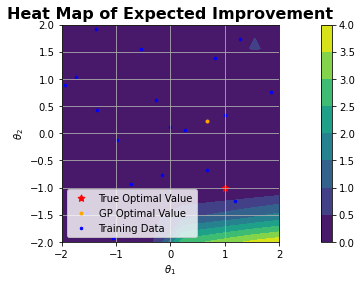

In [10]:
# print(Theta_True, Theta_GP_Opt)
ei_plotter_adv(theta_mesh, EI, Theta_True, train_theta, Theta_GP_Opt, plot_train=True)


#SHould I even plot y, stdev, and error? If so, would I plot them in 3D?

In [12]:
EI_sing = calc_ei_total_test(p,n,Xexp,Yexp, theta_mesh, model, likelihood)[0]
Error =calc_ei_total_test(p,n,Xexp,Yexp, theta_mesh, model, likelihood)[1]
for i in range(n):    
    #Find point w/ best EI
    print(EI_sing[i])
    ei_plotter_adv_test(theta_mesh, EI_sing[i], Theta_True, train_p,Xexp[i],Theta_GP_Opt,plot_train=True)

[[4.11229850e-05 5.26365201e-02 6.82555775e-02 6.06198056e-02
  6.20924588e-03]
 [1.54986275e-04 1.36077309e-01 1.58552251e-01 1.43528851e-01
  1.40617710e-02]
 [1.14776356e-04 5.95999075e-02 5.94939686e-02 5.65165020e-02
  5.50322094e-03]
 [2.97709188e-06 7.20240155e-04 6.12678031e-04 6.37417812e-04
  6.72052175e-05]
 [2.79315802e-03 2.23337021e-01 1.73608415e-01 2.03979062e-01
  2.69534982e-02]
 [3.61877902e-02 8.92085428e-01 6.99114276e-01 9.26117646e-01
  1.60741102e-01]
 [8.68859928e-02 8.85455660e-01 7.34869459e-01 1.08756075e+00
  2.24996811e-01]
 [1.58027774e-01 8.81115003e-01 7.78761183e-01 1.23038268e+00
  2.92170275e-01]
 [2.11543475e-01 9.27967016e-01 8.36305075e-01 1.32636836e+00
  3.45390988e-01]
 [2.11306163e-01 1.03636152e+00 9.04775513e-01 1.35977126e+00
  3.71243998e-01]]


NameError: name 'ei_plotter_adv_test' is not defined

## Analysis of Standard Deviation
 - The GP estimates that the standard deviation is lowest at points that were directly tested
  - This can be rationalized by the way that the contour plot is drawn
 - Standard deviation is smallest away from the edges and larger towards them
  - This is rationalized by the fact that there are less neighbors that the GP is tested and trained with at the boundaries
 - The more points that get tested, the more the standard deviations will decrease

## Analysis of Error Magnitude
 - The GP emulator is most inaccurate when all values of $\bar{p}$ are at their maximum. 
  - In general, the GP is less accurate at extreme points, this is rationalized by the fact that there are less neighbors that the GP is tested and trained with at the boundaries
 - The GP emulator is most accurate when x is at it's maximum, but $\bar{\Theta}= 0$
  - This is rationalized by the fact that multiple terms become zero if any of the values of $\bar{p}$ are zero 
 - GP error is mostly very high, as more iterations are added, these will decrease

## Analysis of GP Emulator (Model y)
 - The GP emulator correctly captures that y increases as $\bar{p}$ increases. This tells us that this GP emulator model could be viable
  - The GP emulator correctly estimates where the lowest y is achieved, but not the actual value of y
  - The GP emulator slightly mistakes where the most positive value of y is, and does not predict the actual value of y
 - The model as it is is inaccurate, BO should increase the accuracy of the emulator